#**HW 3: Convolutional Neural Networks**

In this homework, we will explore how to develop a simple Convolutional Neural Network for image classification. We will use the same dataset that we used in the previous exercise, the Fashion Minst. In the first part, we will learn how to develop a simple CNN, while in the second part we will explore the impact of various hyper-parameters in the learning performances.

## Exercise 3.1: Simple CNN

Let's start by importing Tensorflow, Keras and Numpy

In [0]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(42)

### Load dataset:
Load the Fashion Minst dataset as we did in the previous homework. As you already know Fashion Minst dataset contains grayscale images, and the task consists of classifying the images in the ten classes. As we did in HW2 we have to divide the dataset in training test and validation set. Since we will use a [2DConv](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D) we have to provide also a new dimension of the input that represents the number of channels (that in ggreyscaleimage is just one). Therefore we [tf.expand_dims](https://) dim to do that. Finaly, as we did in HW2 we have to normalize the input data.

In [0]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = (
    fashion_mnist.load_data()) #The dataset is already divede in test and training..

#Normalize the data
pixel_means = X_train_full.mean(axis = 0)
pixel_stds = X_test.std(axis = 0)

X_train_full = (X_train_full - pixel_means) / pixel_stds
X_test = (X_test - pixel_means) / pixel_stds 

#Add one dimension to manage the channel
X_train_full=tf.expand_dims(X_train_full, 3) 
X_test=tf.expand_dims(X_test,3)

#Extract the first 5000 samples of the training set, to use them as the validation set
X_valid, X_train = X_train_full[:5000], X_train_full[5000:] 
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]


4423680/4422102 [==============================] - 0s 0us/step


### Define the model

Let's create a simple CNN. The model will be composed of:
* One 2D convolutional layer with kernel size 3x3 and 32 output filters/features, that use ReLu activation function
* a Max Pooling layer (2D) of size 2x2 ([MaxPool2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D))
* a Flatten layer
* the output layer,  the same we used in HW2 (that use softmax function)
Note that as 'input_shape' attribute's value in the first layer report also the third dimension that represents the channel.

In [0]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=[3,3], padding="same", activation="relu", input_shape=[28, 28,1]),
    keras.layers.MaxPool2D(pool_size=[2,2]),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer='sgd',
              metrics=["accuracy"])


Print the model summary

In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                62730     
Total params: 63,050
Trainable params: 63,050
Non-trainable params: 0
_________________________________________________________________


Note that the number of parameters mostly depends on the output layers, indeed the sharing parameters techinique used by the 2D convolutional layers allows to significantly reduce the number of learnable weights.
Now we can train the model

In [0]:
history = model.fit(X_train, y_train, epochs=10, batch_size=128,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
430/430 [==============================] - 23s 53ms/step - loss: 0.7296 - accuracy: 0.7631 - val_loss: 0.4999 - val_accuracy: 0.8320
Epoch 2/10
430/430 [==============================] - 22s 52ms/step - loss: 0.4737 - accuracy: 0.8370 - val_loss: 0.4335 - val_accuracy: 0.8586
Epoch 3/10
430/430 [==============================] - 22s 52ms/step - loss: 0.4231 - accuracy: 0.8545 - val_loss: 0.4031 - val_accuracy: 0.8618
Epoch 4/10
430/430 [==============================] - 22s 52ms/step - loss: 0.3949 - accuracy: 0.8634 - val_loss: 0.3855 - val_accuracy: 0.8658
Epoch 5/10
430/430 [==============================] - 22s 52ms/step - loss: 0.3761 - accuracy: 0.8697 - val_loss: 0.3745 - val_accuracy: 0.8732
Epoch 6/10
430/430 [==============================] - 22s 52ms/step - loss: 0.3615 - accuracy: 0.8732 - val_loss: 0.3565 - val_accuracy: 0.8792
Epoch 7/10
430/430 [==============================] - 22s 52ms/step - loss: 0.3493 - accuracy: 0.8782 - val_loss: 0.3594 - val_accuracy:

Plot the loss and the accuracy trends for the training and validation set, Then compute the result on the test set.

313/313 - 2s - loss: 0.3577 - accuracy: 0.8751
accuracy: 87.51%


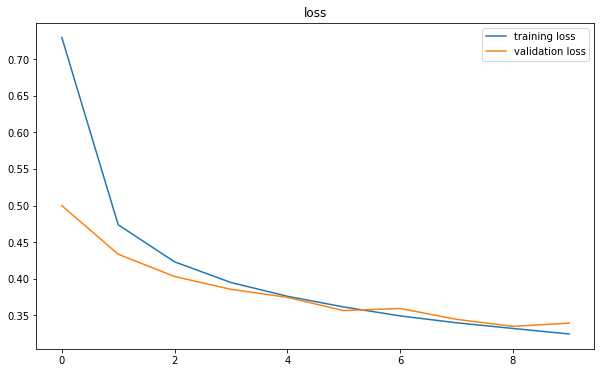

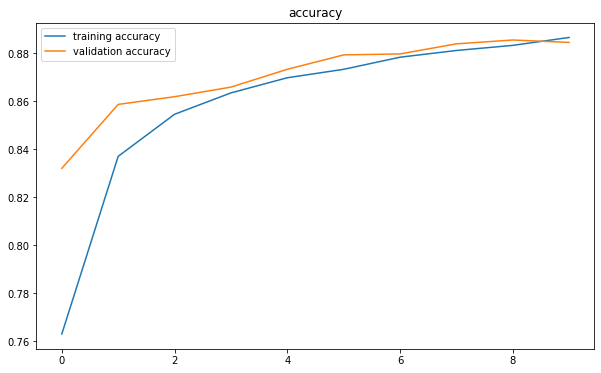

In [0]:
def plot_loss(history):
  plt.figure(figsize=(10,6))
  plt.plot(history.epoch,history.history['loss'],label='training loss')
  plt.plot(history.epoch,history.history['val_loss'], label='validation loss')
  plt.title('loss')
  plt.legend()

def plot_accuracy(history):
  plt.figure(figsize=(10,6))
  plt.plot(history.epoch,history.history['accuracy'], label='training accuracy')
  plt.plot(history.epoch,history.history['val_accuracy'], label='validation accuracy')
  plt.title('accuracy')
  plt.legend()

plot_loss(history)

plot_accuracy(history)

scores = model.evaluate(X_test, y_test, verbose=2)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))



### Visualize Weights

An interesting thing is to visualize the learned weights for the convolutional layer. We have 32 kernels of size 3x3, we can just plot them as images, mapping the weight values to grayscale.

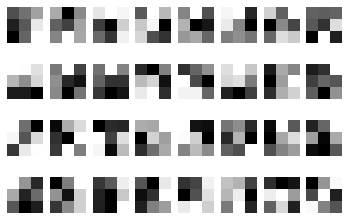

In [0]:
# Weights for the first convolutional layer
w0=model.get_weights()[0][:,:,0,:]

# Normalize to range 0.0 - 1.0
w0-=np.min(w0)
w0/=np.max(w0)

for r in range(4):
    for c in range(8):
        n=r*8+c
        plt.subplot(4, 8, n+1)
        plt.imshow(w0[:,:,n], interpolation='none')
        plt.axis('off')
        plt.gray()
plt.show()

In [0]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.3577 - accuracy: 0.8751


[0.3576916754245758, 0.8751000165939331]

They might be a bit hard to interpret, but it seems that the various filters have learned to detect various corners and edges.

## Exercise 3.2: Develop a better CNN
Let's develop a network that performs better than the very simple one above. This exercise aims to explore how much the various hyper-parameters influence the classification capability of the model. 

**To Complete**: Your task is to do some reparametrizations of the previous exercise's network and compare the results. At least one of them should have an improvement in the test set result (generalization) than the result of the model used in the previous exercise.
In the cell below report only the code of the **best model** that you can find. In addtion, print out its result on the test set, and plot the accuracy and the loss trends in the notebook you return.
Moreover, for each setup you test, analyze and discuss the obtained results briefly in the last cells in the bottom.

Hint: Each reparameterization should change a different aspect in the network, while the rest of the parameters would stay the same. 
Example parameters to try to change (we suggest to test at least one re-parametrization for each of these categories):

*    number of layers or neurons or filters dimension
*   activation functions
*   epochs
*   batch sizes
*   optimizer, see TensorFlow documentation on [optimizers](https://https://www.tensorflow.org/api_docs/python/tf/keras/optimizers)
*   max-pooling on/off on certain layers, or pool size

For what concerns the optimizer, as you can see in the 'compile' method [documentation'](https://www.tensorflow.org/api_docs/python/tf/keras/Model#compile) is it possible to pass as 'optimizer ' attribute's value a string (the name of optimizer) or an optimizer instance.

Notice that changing the final layer's softmax activation plus the categorical_crossentropy loss requires some consideration. Don't do it unless you have a good plan.

In [0]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=[4,4], padding="same", activation="relu", input_shape=[28, 28,1]),
    keras.layers.Conv2D(filters=32, kernel_size=[4,4], padding="same", activation="relu", input_shape=[28, 28,1]),
    keras.layers.MaxPool2D(pool_size=[2,2]),
    keras.layers.Flatten(),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer='adam',
              metrics=["accuracy"])

In [0]:
history1 = model.fit(X_train, y_train, epochs=3, batch_size=50,
                    validation_data=(X_valid, y_valid))

Epoch 1/3
1100/1100 [==============================] - 184s 167ms/step - loss: 0.3618 - accuracy: 0.8710 - val_loss: 0.2551 - val_accuracy: 0.9076
Epoch 2/3
1100/1100 [==============================] - 185s 168ms/step - loss: 0.2246 - accuracy: 0.9191 - val_loss: 0.2386 - val_accuracy: 0.9142
Epoch 3/3
1100/1100 [==============================] - 187s 170ms/step - loss: 0.1676 - accuracy: 0.9379 - val_loss: 0.2246 - val_accuracy: 0.9228


In [0]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 8s 26ms/step - loss: 0.2390 - accuracy: 0.9162


[0.23897796869277954, 0.9161999821662903]

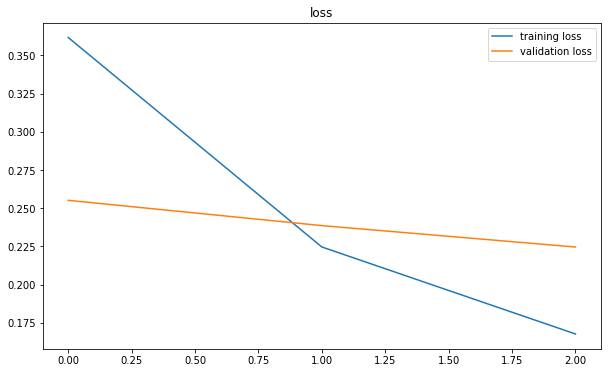

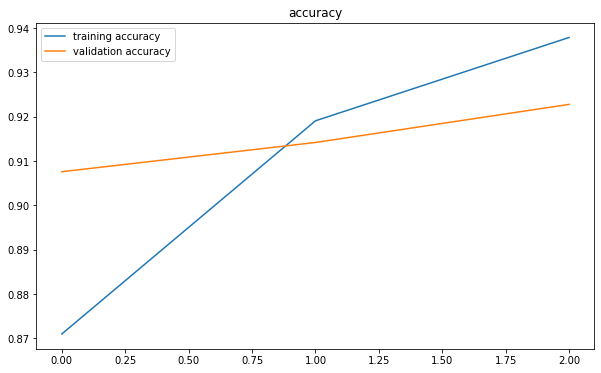

In [0]:
plot_loss(history1)
plot_accuracy(history1)


### Test results discussion
The best model that I found is the one shown above.


The achieved accuracy in the test set is $0.9162$


Discussion:
Concerning the architecture, the differences respect to the one that was already built are the following:
- One additional convolutional layer
- Different kernel size
- One additional dense layer

The choice of the pooling and of the activation function remained instead the same. Concerning the learning procedure, the differences are:
- Smaller batch size
- Less epochs
- Adam optimizer

The changes that lead to the most important improvement were the addition of the convolutional layer, the choice of adam in place of sgd, the reduction of the batch size; less was the impact of the others changes. In this case three epochs were needed to reach the maximum accuracy on the validation set.

Besides, I also tested other models: 
Many possibilities for the various hyperparameters were tested, for example:
- No additional convolutional layer
- No additional dense layer
- Average pooling instead of max pooling
- Different pooling size ([3,3], [4,4])
- Different kernel size ([2,2])
- sigmoid activation function
- tanh activation function
- Different batch sizes

Discussion:
Some of these choices didn't make a performance very different from the best one (slightly different batch size, no additional dense layer, different activation function, different kernel size, different pooling size) while the most part of the improvement was due to the choice of adam and of the additional convolutional layer. The choice of the number of epochs was always the last thing, in order to choose a proper number (not too small, to reach the best accuracy on the validation data, not too big, to avoid overfitting).